a)
1. 生成数据集，用闭式解直接得出a

b)
2. 回答，什么是$a_t$的梯度。
3. 用梯度下降找近似解，三种学习率，带初始化，画图，评论，时间

c)
4. 用SGD，三种学习率，1000iters，画图，评论，比较，时间，要用第二问的metric作比较。

d = train_n

a)
1. 用公式计算baseline，不带re。计算training error and test error，10次平均，归一化

b)
2. 用闭式解求a，记录error,画图。7个$\lambda$。10次平均。评论与a对比，画图

c)
3. 初始化0，1,000,000iters，3step size,2error,avg10,与第一问4作比较。与a作比较。解释

d)
4. 画图train error，true_a 横线
5. 再画图，test error，1更新/100iters
6. 最后画一次图。l2
画完图，bb

e)fix lambda， initiallize point。画图avg 2error。b作为baseline

# Part 1: Regression, Three Ways

We will consider the problem of fitting a linear model. Given d-dimensional input data $x^{(1)}, ... , x^{(n)} \in R^d$
with real-valued labels $y^{(1)}, ... , y^{(n)} \in R$, the goal is to find the coefficient vector $a$ that minimizes the
sum of the squared errors. The total squared error of $a$ can be written as $f(a) = \sum_{i=1}^{n}f_i(a)$, where
$f_i(a) = (a^Tx^{(i)}-y^{(i)})^2$ denotes the squared error of the ith data point.

The data in this problem will be drawn from the following linear model. For the training data, we select
$n$ data points $x^{(1)}, ... , x^{(n)}$
, each drawn independently from a d-dimensional Gaussian distribution. We then
pick the “true” coefficient vector $a^*$
(again from a d-dimensional Gaussian), and give each training point $x^{(i)}$
a label equal to $(a^*)^Tx^{(i)}$ plus some noise (which is drawn from a 1-dimensional Gaussian distribution).2


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
test_mode = False

The following Python code will generate the data used in this problem.

In [2]:
#generate the data
d = 100
n = 1000
X = np.random.normal(0,1, size = (n,d))
a_true = np.random.normal(0,1,size=(d,1))
y = X @ a_true + np.random.normal(0, 0.5, size = (n,1))

### (a) (4 points) Least-squares regression has the closed form solution $a = (X^TX)^{−1}X^Ty$, which minimizes the squared error on the data. (Here $X$ is the $n * d$ data matrix as in the code above, with one row per data point, and $y$ is the n-vector of their labels.) Solve for $a$ and report the value of the objective function using this value $a$. For comparison, what is the total squared error if you just set a to be the all 0’s vector?


In [3]:
a_base = np.linalg.inv(X.T @ X) @ X.T @ y
print('closed form solution a:\n', a_base.T)

closed form solution a:
 [[-1.03329157 -0.47011781  1.70367273 -0.70714073 -1.60530165  0.65949917
  -1.47020086  0.08861308 -1.23746856  0.67915359  0.69538335 -0.96091083
   0.9203457  -0.92961297  1.06653949 -0.82221142 -0.60148806 -2.27536723
  -0.54168583 -0.89064616  0.59674426  0.24914377 -1.01341212 -0.76300754
  -0.85765302  0.30899421 -0.33462185  0.49669661 -0.76938937 -0.39274396
   0.27525512  0.88611462 -0.44651687  0.31162016  0.86103183 -1.5037344
  -1.43144045 -0.64424707 -0.98858986 -0.79118548 -0.74464433  0.71276302
   0.88467248  0.26436485  0.38204805 -0.95971854  0.2947217   1.02504544
  -0.17944662  0.27605011 -1.58027213 -1.21467526  0.98696425  0.84626611
   0.33708737  0.26120292  0.82513215 -1.06727265 -0.51630034  0.78937539
  -0.71505926  0.2413971   0.12383724 -1.89704157 -0.3783159  -0.08463145
   0.61264141  1.13095162  1.62988969  1.69541771 -0.30077349  0.51682332
   0.53277874 -0.29772005 -1.21084253 -1.29380402  0.21382021 -0.10338378
   1.43079309 

In [4]:
def MSELoss(y1, y2):
    return np.sum((y1-y2)**2)

In [5]:
y1 = X @ a_base
print('value of the objective function using value a = ', MSELoss(y1, y))
print('value of the objective function seting a to zero = ', MSELoss(y,0))

value of the objective function using value a =  217.08398459282802
value of the objective function seting a to zero =  78726.3543829251


<font color=blue> The squared error of the solving $a$ is far more less than all 0's vector. It means the $a_{base}$ we get is  correct. </font>

### (b) (6 points) In this part, you will solve the same problem via gradient descent on the squared-error objective function $f(a) = \sum_{i=1}^{n}{f_i(a)}$. Recall that the gradient of a sum of functions is the sum of their gradients. Given a point $a_t$, what is the gradient of f at $a_t$? 

b)

$$\because Xa = \left[\begin{matrix}
   \sum_\limits{i = 1}^dx_{1i}a_i \\
   \sum_\limits{i = 1}^dx_{2i}a_i \\
   \vdots \\
   \sum_\limits{i = 1}^dx_{ni}a_i \\
\end{matrix}\right]$$

$$\therefore \frac{\partial Xa}{\partial a_t} = \left[\begin{matrix}
    x_{1t} \\
    x_{2t} \\
    \vdots \\
    x_{nt} \\
\end{matrix}\right]$$

$$\therefore \frac{\partial f(a)}{\partial a_t} 
= \frac{\partial (Xa - y)^T(Xa - y)}{\partial a_t}
=  2(Xa - y)^T\left[\begin{matrix}
    x_{1t} \\
    x_{2t} \\
    \vdots \\
    x_{nt} \\
\end{matrix}\right]$$

### Now use gradient descent to find a coefficient vector $a$ that approximately minimizes the least squares objective function over the data. Run gradient descent three times, once with each of the step sizes $0.00005$, $0.0005$, and $0.0007$. You should initialize $a$ to be the all-zero vector for all three runs. Plot the objective function value for 20 iterations for all 3 step sizes on the same graph. Comment in 3-4 sentences on how the step size can affect the convergence of gradient descent (feel free to experiment with other step sizes). Also report the step size that had the best final objective function value and the corresponding objective function value.

In [6]:
#index from 0 to n-1
#gradient without l2
def getGradient(X, y, a, index, lambda_value = 0):
    #gradient below is for index -> a_t
    #gradient = 2 * (X@a  - y).T @ (X[:,index])
    #now change into index -> x_i
    gradient = (2 * (X[index]@a-y[index]) * X[index]).reshape(-1,1) + (2 * lambda_value * a).reshape(-1,1)
    return gradient.reshape((-1,1))

def GDTrain(X, y, step_size, train_step, metric = MSELoss):
    # extra dimension = 1 of a is necessary!!!
    # nasty broadcase algirhtm
    a = np.zeros((len(X[0]),1))
    obj_value = np.zeros(train_step+1)
    obj_value[0] = metric(X @ a, y)
    for iters in range(train_step):
        gds = np.zeros((len(X[0]),1))
        for index in range(len(X)):
            gds += getGradient(X, y, a, index)
        #update a with gradient
        a = a - step_size * gds
        obj_value[iters+1] = metric(X @ a, y)
    return obj_value

final objective values of step size = 0.000050 is: 2123.583013
final objective values of step size = 0.000500 is: 217.085547
final objective values of step size = 0.000700 is: 917818762.550134


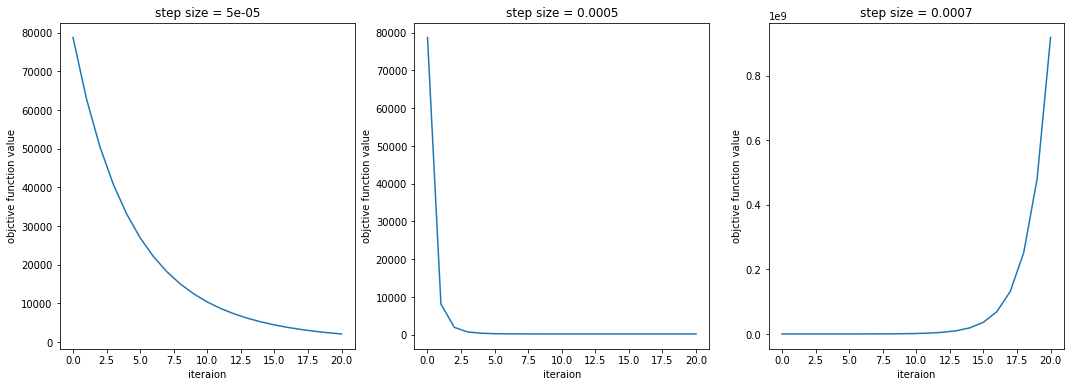

average running time = 0.14623084933343003 s


In [12]:
train_step = 20
step_size_list =  [0.00005,0.0005,0.0007]
plt.figure(figsize=(3*(len(step_size_list)+3),(len(step_size_list)+3)))

running_time = 0

for i in range(len(step_size_list)):
    running_start = time.clock()
    obj_value = GDTrain(X, y, step_size_list[i], train_step)
    running_time += time.clock() - running_start
    x_index = list(range(0,train_step+1,1))
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('objctive function value')
    plt.plot(x_index, obj_value)
    print('final objective values of step size = %lf is: %lf' % (step_size_list[i], obj_value[-1]))

plt.show()
print('average running time =', running_time / len(step_size_list), 's')

<font color=blue>With the increase of step size, the convergence speed gets faster, but when the step size is too large, the objective function will stay at the local optimum, or even diverge. The step size of 0.0005 is the best one and the final objective values is similar to the closed solution's.</front>

### (c) (6 points) In this part you will run stochastic gradient descent to solve the same problem. Recall that in stochastic gradient descent, you pick one datapoint at a time, say $(x^{(i)}, y^{(i)})$, and update your current value of $a$ according to the gradient of $f_i(a) = (a^Tx^{(i)}-y^{(i)})^2$.

In [14]:
def SGDTrain(X, y, step_size, iters, metric = MSELoss, evaluate = False, lambda_value = 0, random_radius = 0):
    a = np.random.uniform(0,random_radius, size = (len(X[0]),1))
    obj_value = np.zeros(iters+1)
    test_error = np.zeros(iters//100 + 1)
    obj_value[0] = metric(X @ a, y)
    if evaluate:
        global X_test, y_test
        test_error[0] = metric(X_test @ a, y_test)
    for i in range(iters):
        index = np.random.randint(0,len(X))
        gd = getGradient(X, y, a, index, lambda_value)
        #update a with gradient
        a = a - step_size * gd
        obj_value[i+1] = metric(X @ a, y)
        
        if evaluate and (i+1) % 100 == 0:
            test_error[(i+1)//100] = metric(X_test @ a, y_test)
    if evaluate:
        return obj_value, test_error
    else:
        return obj_value

### Run stochastic gradient descent using step sizes ${0.0005, 0.005, 0.01}$ and 1000 iterations. Plot the objective function value vs. the iteration number for all 3 step sizes on the same graph. Comment 3-4 sentences on how the step size can affect the convergence of stochastic gradient descent and how it compares to gradient descent. Compare the performance of the two methods. How do the best final objective function values compare? How many times does each algorithm use each data point? Also report the step size that had the best final objective function value and the corresponding objective function value.

final objective values of step size = 0.000500 is: 12439.298220
final objective values of step size = 0.005000 is: 458.280787
final objective values of step size = 0.010000 is: 251031.533538


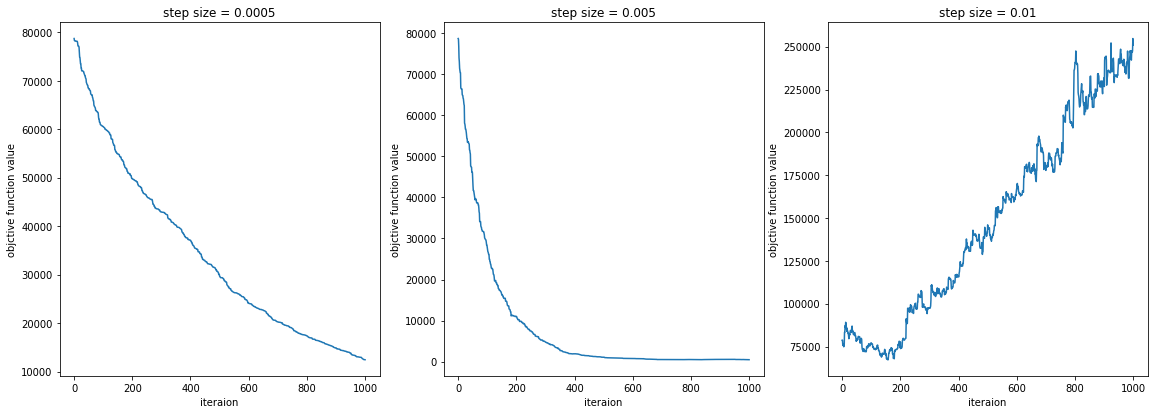

average running time = 0.030899059666505007 s


In [16]:
train_iter = 1000
step_size_list =  [0.0005,0.005,0.01]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

running_time = 0

for i in range(len(step_size_list)):
    running_start = time.clock()
    obj_value = SGDTrain(X, y, step_size_list[i], train_iter)
    running_time += time.clock() - running_start
    x_index = list(range(0,train_iter+1,1))
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('objctive function value')
    plt.plot(x_index, obj_value)
    print('final objective values of step size = %lf is: %lf' % (step_size_list[i], obj_value[-1]))

plt.show()
print('average running time =', running_time / len(step_size_list), 's')

<font color=blue>Similar to the (b), with the increase of step size, the convergence speed gets faster, but when the step size is too large, the objective function will stay at the local optimum, or even diverge. 

The objective function values change roughly by using SGD, with simialr trandency with that by using GD.

The speed of SGD is much faster than GD. SGD converges time is only 1/5 of GD's.

The best final objective function values of SGD is larger than that in GD, 458.2807 vs 217.0854.


$T_{GD}  = \frac{average time}{20 (iterations) * 1000 (data point/iteration)}  = 7.311e-06 s$

$T_{SGD} = \frac{average time}{1000 (iterations) * 1 (data point/iteration)}   = 0.3089e-06 s$

The step size with best final objective function values of SGD is 0.005.

In [20]:
#using another metric, y2 is the real ture output
def NormMSELoss(y1, y2):
    return np.sqrt(np.sum((y1 - y2)**2)/np.sum(y2**2))

final objective values of step size = 0.000500 is: 0.398627
final objective values of step size = 0.005000 is: 0.077904
final objective values of step size = 0.010000 is: 1.162835


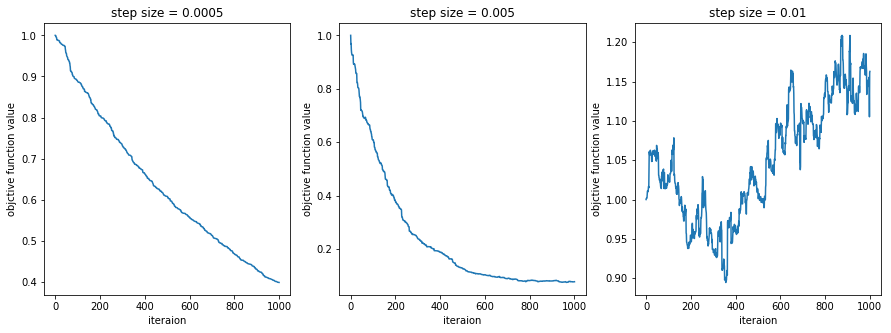

average running time = 0.03824149633358805 s


In [21]:
train_iter = 1000
step_size_list =  [0.0005,0.005,0.01]
plt.figure(figsize=(3*(len(step_size_list)+2),(len(step_size_list)+2)))

running_time = 0

for i in range(len(step_size_list)):
    running_start = time.clock()
    obj_value = SGDTrain(X, y, step_size_list[i], train_iter, NormMSELoss)
    running_time += time.clock() - running_start
    x_index = list(range(0,train_iter+1,1))
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('objctive function value')
    plt.plot(x_index, obj_value)
    print('final objective values of step size = %lf is: %lf' % (step_size_list[i], obj_value[-1]))
    
plt.show()
print('average running time =', running_time / len(step_size_list), 's')

# Part 2

In [12]:
#initialize variable to get the avg error
train_n = 100
test_n = 1000
d = 100
X_train = np.random.normal(0,1, size=(train_n,d))
a_true = np.random.normal(0,1, size=(d,1))
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
X_test = np.random.normal(0,1, size=(test_n,d))
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

def init():
    global X_train, a_true, y_train, X_test, y_test
    X_train = np.random.normal(0,1, size=(train_n,d))
    a_true = np.random.normal(0,1, size=(d,1))
    y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
    X_test = np.random.normal(0,1, size=(test_n,d))
    y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

a)

In [13]:
trial_times = 100
training_error_base1 = 0
test_error_base1 = 0

for _ in range(trial_times):
    init()
    a_base = np.linalg.inv(X_train) @ y_train
    training_error_base1 += NormMSELoss(X_train @ a_base, y_train)
    test_error_base1 += NormMSELoss(X_test @ a_base, y_test)

training_error_base1 /= trial_times
test_error_base1 /= trial_times
print('training error = ', training_error_base1)
print('test error = ', test_error_base1)

training error =  4.272793641827482e-14
test error =  1.9607951803332988


b)

In [14]:
trial_times = 100
lambda_list = [0.00005, 0.0005,0.005,0.05,0.5,5,50,500]
training_error_base2 = []
test_error_base2 = []
print('|lambda|training error|test error|')
for i in range(len(lambda_list)):
    training_error = 0
    test_error = 0
    a_base = 0
    for _ in range(trial_times):
        init()
        a_base = np.linalg.inv(X_train.T @ X_train + lambda_list[i] * np.eye(len(X_train)))@X_train.T@y_train
        training_error += NormMSELoss(X_train @ a_base, y_train)
        test_error += NormMSELoss(X_test @ a_base, y_test)
    
    training_error_base2.append(training_error/trial_times)
    test_error_base2.append(test_error/trial_times)
    
    print('|%6.4g|      %6lf|  %8.5lf|' %(lambda_list[i], training_error_base2[i],test_error_base2[i]))
    
#construct error dictionary
training_error_base_dic = dict(zip(lambda_list,training_error_base2))
test_error_base_dic = dict(zip(lambda_list,test_error_base2))

|lambda|training error|test error|
| 5e-05|      0.000331|   1.03968|
|0.0005|      0.000930|   0.68463|
| 0.005|      0.002327|   0.40003|
|  0.05|      0.005558|   0.26125|
|   0.5|      0.016338|   0.23931|
|     5|      0.067696|   0.33836|
|    50|      0.292609|   0.58070|
|   500|      0.740418|   0.86265|


评论

c)

|step size|training error|test error|
|    5e-05|      0.019490|  0.230248|
|   0.0005|      0.009253|  0.399648|
|    0.005|      0.000208|  0.787931|


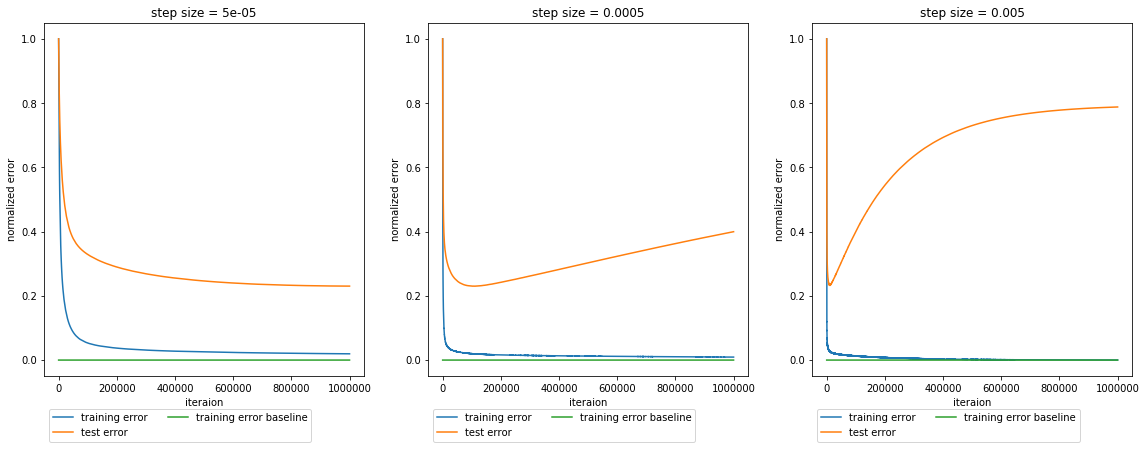

average running time = 70.73227492246015 s


In [15]:
train_iter = 1000000
trial_times = 10
if test_mode == True:
    train_iter = 10000
step_size_list =  [0.00005,0.0005, 0.005]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

print('|step size|training error|test error|')

total_running_time = 0
for i in range(len(step_size_list)):
    #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, step_size_list[i], train_iter,\
                                             NormMSELoss, evaluate = True)
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors

    total_running_time += running_time / trial_times
    
    print('|%9.4g|      %6lf|  %6lf|' %(step_size_list[i], \
                                        total_training_errors[-1]/trial_times, \
                                        total_test_errors[-1]/trial_times))
    
    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)
    
    #draw base line
    global training_error_base, test_error_base

    plt.plot(x_index1, training_error_base1 * np.ones(len(x_index1)))
    
    plt.legend(['training error', 'test error', 'training error baseline'],\
              bbox_to_anchor = (0,-0.2), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(step_size_list), 's')

只迭代10次，l2的normalize error可以到0.1，但是对于sgd，需要大量iterations让normalize error下降，且normalize error到0.2就反弹了。与第一题对比*&%&￥&#&￥

d)

i)ii)图在c哪里。评论

iii)

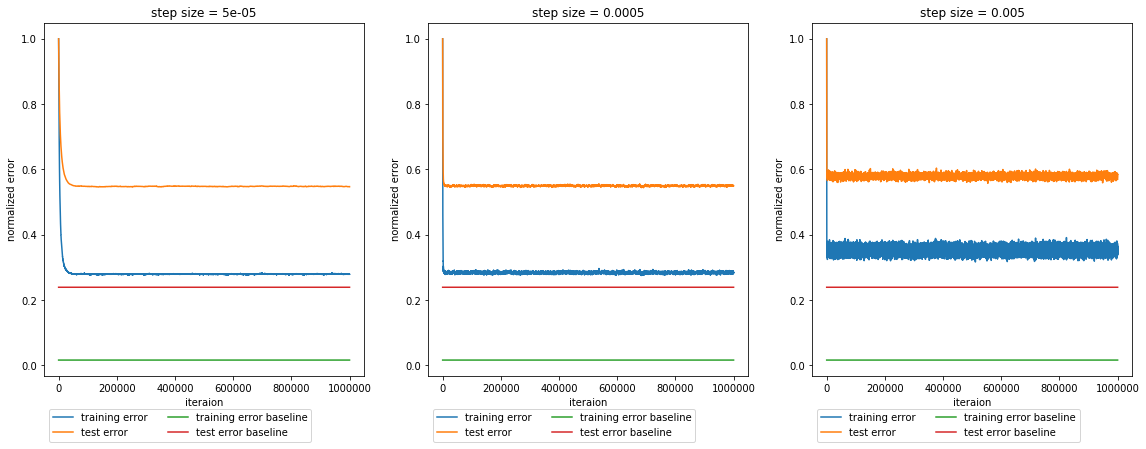

average running time = 176.57945587494183 s


In [16]:
train_iter = 1000000
trial_times = 10
if test_mode == True:
    train_iter = 10000
step_size_list =  [0.00005,0.0005, 0.005]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

total_running_time = 0

for i in range(len(step_size_list)):
    #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, step_size_list[i], train_iter,\
                                             NormMSELoss, evaluate = True, lambda_value = 0.5)
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors
    
    total_running_time += running_time / trial_times

    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)
    
    #draw base line
    global training_error_base, test_error_base
    plt.plot(x_index1, training_error_base_dic[0.5] * np.ones(len(x_index1)))
    plt.plot(x_index2, test_error_base_dic[0.5] * np.ones(len(x_index2)))
    
    plt.legend(['training error', 'test error', 'training error baseline', 'test error baseline'],\
              bbox_to_anchor = (0,-0.2), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(step_size_list), 's')

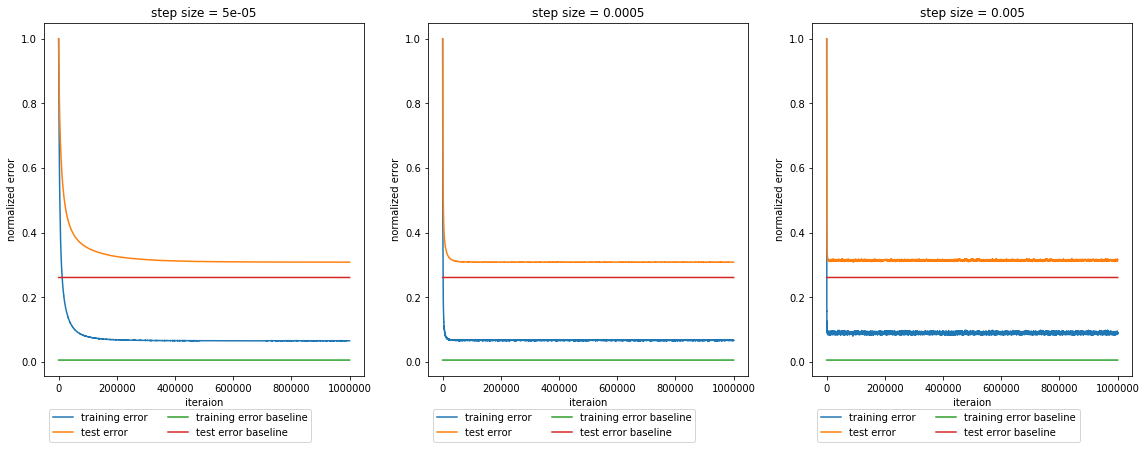

average running time = 282.39671939385966 s


In [17]:
train_iter = 1000000
trial_times = 10
if test_mode == True:
    train_iter = 10000
step_size_list =  [0.00005,0.0005, 0.005]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

total_running_time = 0
for i in range(len(step_size_list)):
    #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, step_size_list[i], train_iter,\
                                             NormMSELoss, evaluate = True, lambda_value = 0.05)
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors
    
    total_running_time += running_time / trial_times

    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)
    
    #draw base line
    global training_error_base, test_error_base
    plt.plot(x_index1, training_error_base_dic[0.05] * np.ones(len(x_index1)))
    plt.plot(x_index2, test_error_base_dic[0.05] * np.ones(len(x_index2)))
    
    plt.legend(['training error', 'test error', 'training error baseline', 'test error baseline'],\
              bbox_to_anchor = (0,-0.2), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(step_size_list), 's')

评论

e)

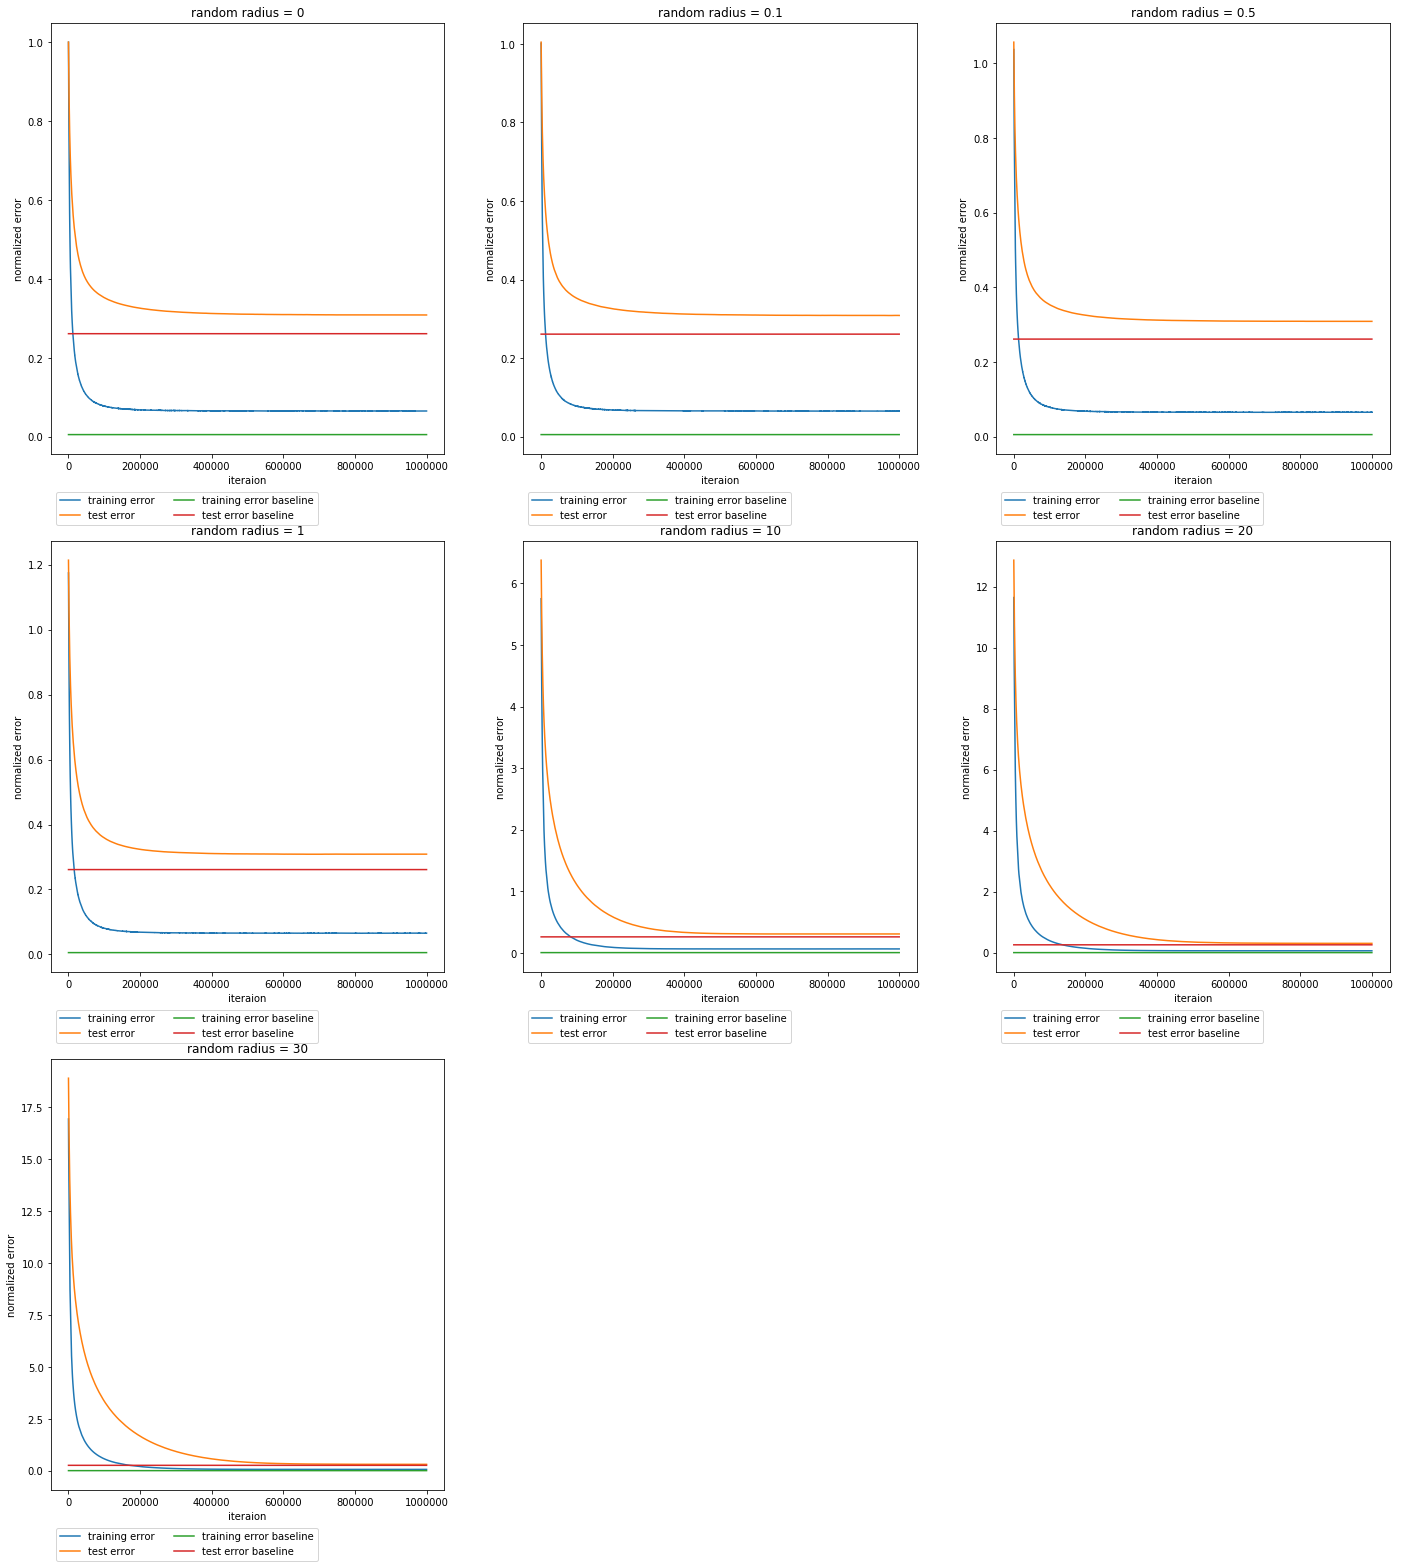

average running time = 458.62515939433445 s


In [18]:
train_iter = 1000000
trial_times = 10
if test_mode == True:
    train_iter = 10000
radius_list =  [0,0.1,0.5,1,10,20,30]
plt.figure(figsize=(3*(len(step_size_list)+5),3*(len(step_size_list)+6)))

total_running_time = 0
for i in range(len(radius_list)):
   #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, 0.00005, train_iter,\
                                             NormMSELoss, evaluate = True, lambda_value = 0.05,\
                                               random_radius = radius_list[i])
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors
    
    total_running_time += running_time / trial_times

    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(3,len(radius_list) // 3 + 1,i+1)
    plt.title('random radius = ' + str(radius_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)
    
    #draw base line
    global training_error_base, test_error_base
    plt.plot(x_index1, training_error_base_dic[0.05] * np.ones(len(x_index1)))
    plt.plot(x_index2, test_error_base_dic[0.05] * np.ones(len(x_index2)))
    
    plt.legend(['training error', 'test error', 'training error baseline', 'test error baseline'],\
              bbox_to_anchor = (0,-0.175), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(radius_list), 's')

评论

# Part3
不择手段

In [21]:
train_n = 100
test_n = 10000
d = 200
X_train = np.random.normal(0,1, size=(train_n,d))
a_true = np.random.normal(0,1, size=(d,1))
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
X_test = np.random.normal(0,1, size=(test_n,d))
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

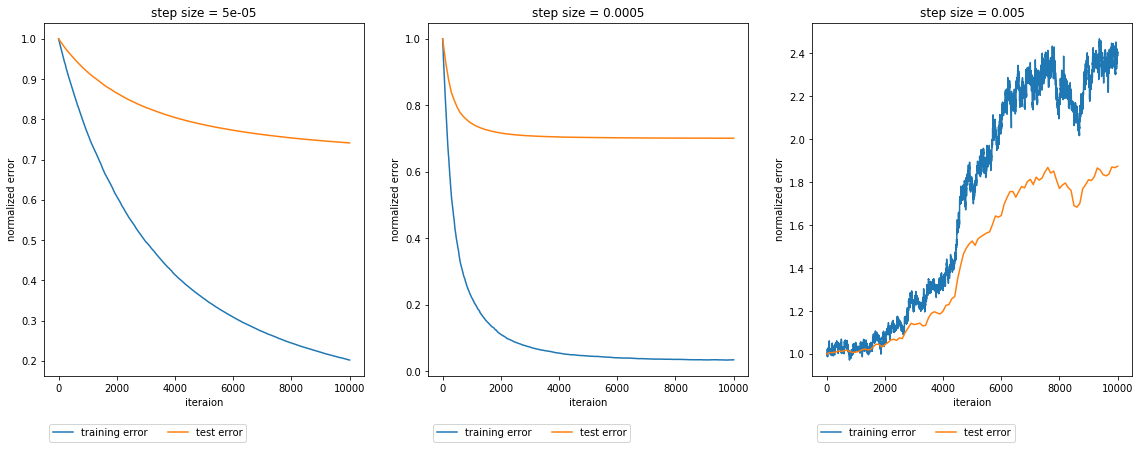

average running time = 603.8110518721996 s


In [23]:
train_iter = 10000
trial_times = 10
step_size_list =  [0.00005,0.0005, 0.005]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

total_running_time = 0
for i in range(len(step_size_list)):
    #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, step_size_list[i], train_iter,\
                                             NormMSELoss, evaluate = True, lambda_value = 0.05)
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors
    
    total_running_time += running_time / trial_times

    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)
    
    plt.legend(['training error', 'test error'],\
              bbox_to_anchor = (0,-0.2), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(step_size_list), 's')

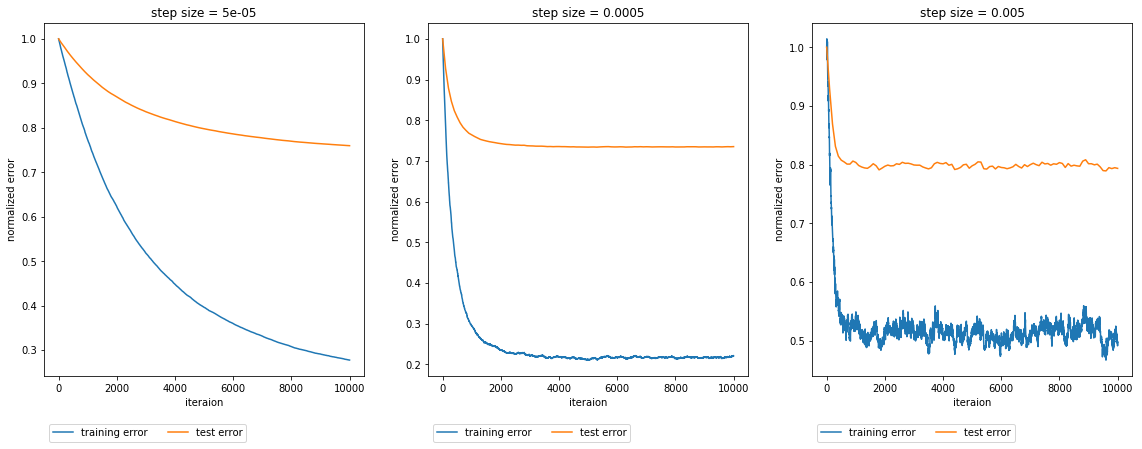

average running time = 605.2060974506016 s


In [24]:
train_iter = 10000
trial_times = 10
step_size_list =  [0.00005,0.0005, 0.005]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

total_running_time = 0
for i in range(len(step_size_list)):
    #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, step_size_list[i], train_iter,\
                                             NormMSELoss, evaluate = True, lambda_value = 0.5)
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors
    
    total_running_time += running_time / trial_times

    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)

    plt.legend(['training error', 'test error'],\
              bbox_to_anchor = (0,-0.2), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(step_size_list), 's')

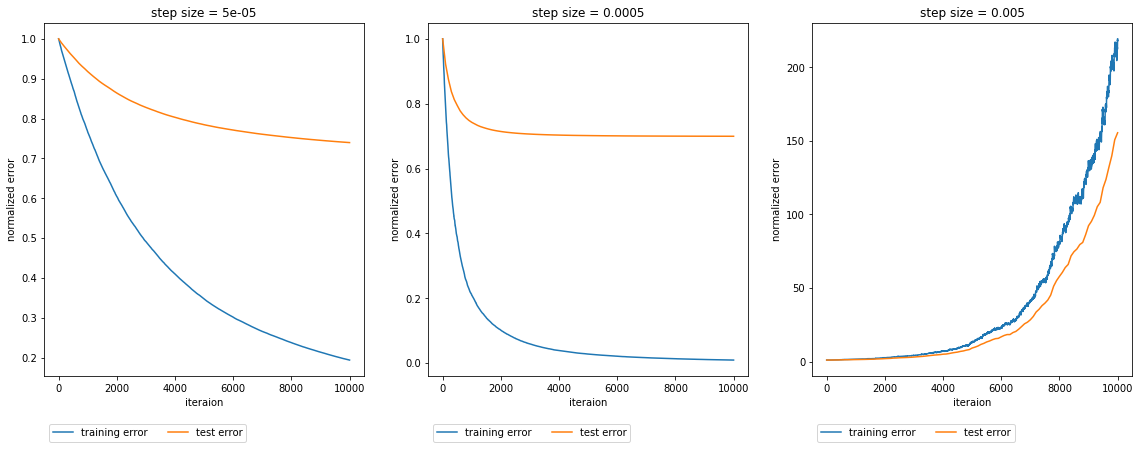

average running time = 606.5597545618056 s


In [25]:
train_iter = 10000
trial_times = 10
step_size_list =  [0.00005,0.0005, 0.005]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

total_running_time = 0
for i in range(len(step_size_list)):
    #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, step_size_list[i], train_iter,\
                                             NormMSELoss, evaluate = True, lambda_value = 0.005)
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors
    
    total_running_time += running_time / trial_times

    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)
    
    plt.legend(['training error', 'test error'],\
              bbox_to_anchor = (0,-0.2), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(step_size_list), 's')

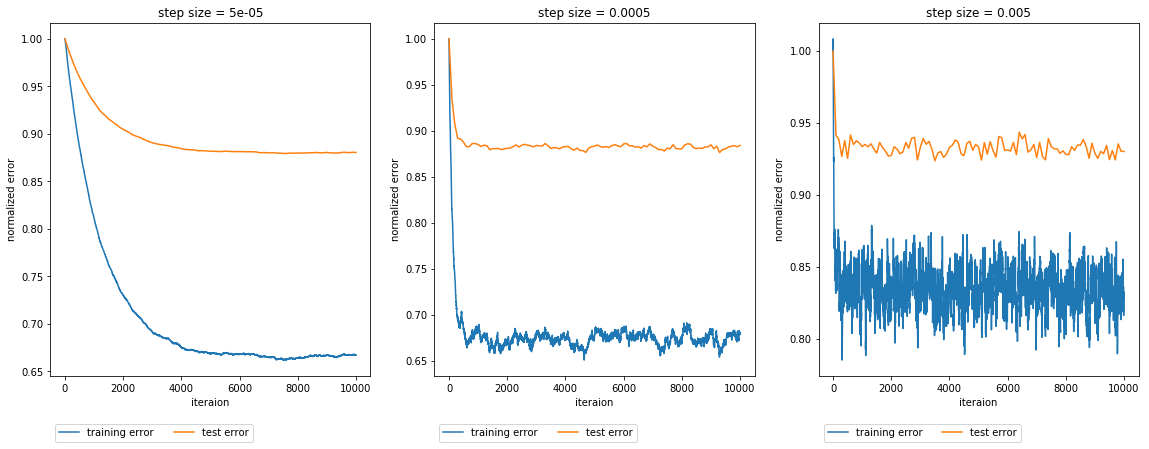

average running time = 607.9380555786225 s


In [26]:
train_iter = 10000
trial_times = 10
step_size_list =  [0.00005,0.0005, 0.005]
plt.figure(figsize=(3*(len(step_size_list)+3.5),(len(step_size_list)+3.5)))

total_running_time = 0
for i in range(len(step_size_list)):
    #for 10 times
    runnign_time = 0
    total_training_errors = np.zeros(train_iter+1)
    total_test_errors = np.zeros(train_iter//100+1)
    
    for _ in range(trial_times):
        running_start = time.clock()
        training_errors, test_errors = SGDTrain(X_train, y_train, step_size_list[i], train_iter,\
                                             NormMSELoss, evaluate = True, lambda_value = 5)
        running_time += time.clock() - running_start
        total_training_errors += training_errors
        total_test_errors += test_errors
    
    total_running_time += running_time / trial_times

    x_index1 = list(range(0,train_iter+1,1))
    x_index2 = list(range(0,train_iter+1,100))
    
    plt.subplot(1,len(step_size_list),i+1)
    plt.title('step size = ' + str(step_size_list[i]))
    plt.xlabel('iteraion')
    plt.ylabel('normalized error')
    plt.plot(x_index1, total_training_errors/trial_times)
    plt.plot(x_index2, total_test_errors/trial_times)

    plt.legend(['training error', 'test error'],\
              bbox_to_anchor = (0,-0.2), loc = 3, ncol = 2)

plt.show()
print('average running time =', total_running_time / len(step_size_list), 's')